In [2]:
import pandas as pd

emo_df = pd.read_parquet('../preprocessed/GoEmotions.parquet')

In [9]:
emo_df

,text,emotion_ids,instance_id,split,emotions_label,emotions
0,My favourite food is anything I didn't have to...,[27],eebbqej,train,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[neutral]
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,train,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[neutral]
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,train,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[anger]
3,To make her feel threatened,[14],ed7ypvh,train,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[fear]
4,Dirty Southern Wankers,[3],ed0bdzj,train,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[annoyance]
...,...,...,...,...,...,...
54258,Thanks. I was diagnosed with BP 1 after the ho...,[15],efeeasc,test,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[gratitude]
54259,Well that makes sense.,[4],ef9c7s3,test,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",[approval]
54260,Daddy issues [NAME],[27],efbiugo,test,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[neutral]
54261,So glad I discovered that subreddit a couple m...,[0],efbvgp9,test,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[admiration]


In [12]:
import numpy as np

np.mean([len(e) for e in emo_df.emotions])

1.175976263752465

In [38]:
emo_groups = {
    'Positive': {'amusement', 'excitement', 'joy', 'love', 'desire', 'optimism', 'caring', 'pride', 'admiration', 'gratitude', 'relief', 'approval'},
    'Ambiguous': {'realization', 'surprise', 'curiosity', 'confusion', 'neutral'},
    'Negative': {'fear', 'nervousness', 'remorse', 'embarrassment', 'disappointment', 'sadness', 'grief', 'disgust', 'anger', 'annoyance', 'disapproval'}
}

In [25]:
from collections import Counter

emo_count = Counter([emo for ems in emo_df.emotions for emo in ems]).most_common()
emo_count

[('neutral', 17772),
 ('admiration', 5122),
 ('approval', 3687),
 ('gratitude', 3372),
 ('annoyance', 3093),
 ('amusement', 2895),
 ('curiosity', 2723),
 ('disapproval', 2581),
 ('love', 2576),
 ('optimism', 1976),
 ('anger', 1960),
 ('joy', 1785),
 ('confusion', 1673),
 ('sadness', 1625),
 ('disappointment', 1583),
 ('realization', 1382),
 ('caring', 1375),
 ('surprise', 1330),
 ('excitement', 1052),
 ('disgust', 1013),
 ('desire', 801),
 ('fear', 764),
 ('remorse', 669),
 ('embarrassment', 375),
 ('nervousness', 208),
 ('relief', 182),
 ('pride', 142),
 ('grief', 96)]

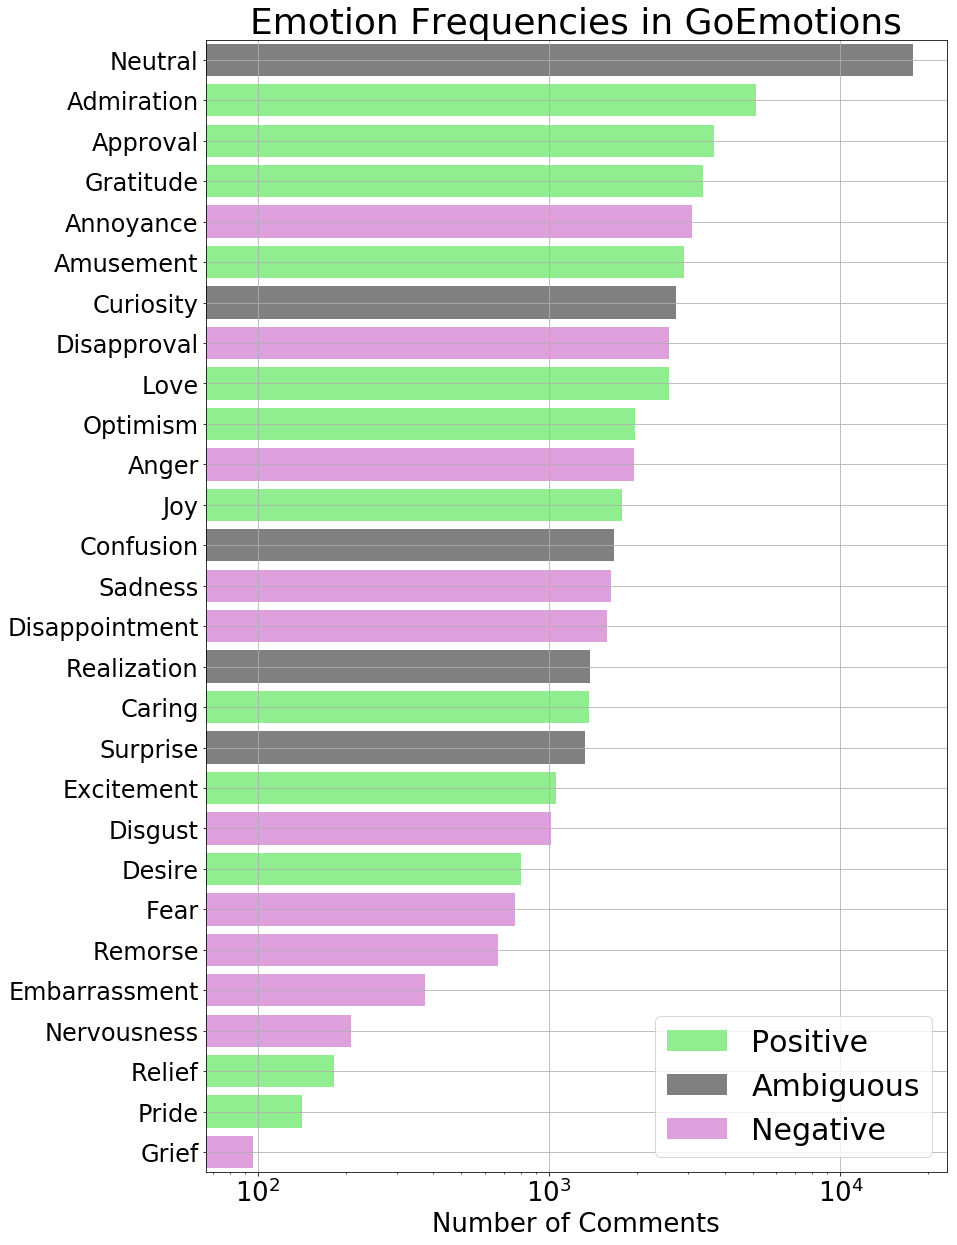

In [52]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Prepare the data
num_emos = len(emo_count)
categories = [emo for emo, count in emo_count]
counts = [count for emo, count in emo_count]
positions = [num_emos - 0.5 - i for i in range(num_emos)]
colors = {'Positive': 'lightgreen', 'Ambiguous': 'grey', 'Negative': 'plum'}

# Set the environment
matplotlib.rcParams.update({'font.size': 24})
plt.figure(figsize=(14, 18))
plt.xscale('log')
plt.ylim(0, num_emos)
plt.yticks(positions, [c.capitalize() for c in categories])

# Plot each line with hatches
for cat, count, pos in zip(categories, counts, positions):
    group = 'Ambiguous'
    for grp, emo_set in emo_groups.items():
        if cat in emo_set:
            group = grp
    color = colors[group]
    plt.barh(pos, count, label=group, color=color)

matplotlib.rcParams.update({'font.size': 30})
plt.xlabel('Number of Comments', fontsize=26)
plt.xticks(fontsize=26)
plt.title('Emotion Frequencies in GoEmotions')
plt.legend(handles=[mpatches.Patch(facecolor=color, label=cat) for cat, color in colors.items()])
plt.grid()
plt.tight_layout()
plt.savefig('../output/GoEmotionsFrequencies.pdf')